<a href="https://colab.research.google.com/github/luannylucena/analise_covid_ada/blob/main/Analise_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados de Covid-19

## Importando Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
mortes = pd.read_csv('/home/luanny/Área de Trabalho/covid-19-dataset/COVID DEATHS.csv')
vacinas = pd.read_csv('/home/luanny/Área de Trabalho/covid-19-dataset/COVID_VACCINATIONS.csv')




FileNotFoundError: ignored

## Perguntas

#### Os 10 paises com maior população tiveram maiores números, em proporção, de mortes por Covid-19?

In [ ]:
mortes.keys()

Index(['iso_code', 'continent', 'location', 'date', 'population',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million'],
      dtype='object')

In [ ]:
mortes.head(10)

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,1/3/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/4/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/5/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/6/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/7/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,1/8/2020,41128772,NaN,0.0,0.0,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,1/9/2020,41128772,NaN,0.0,0.0,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,1/10/2020,41128772,NaN,0.0,0.0,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,1/11/2020,41128772,NaN,0.0,0.0,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,1/12/2020,41128772,NaN,0.0,0.0,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Para a primeira pergunta, estamos focados apenas em paises, por isso, iremos retirar as linhas que tem NaN na coluna continente

In [ ]:
mortes = mortes.dropna(subset = 'continent')

<b> Agora vamos conferir se os 10 paises mais populosos tiveram a maior proporção de mortes

In [ ]:
populacao = mortes.sort_values(by = 'population', ascending = False).drop_duplicates(subset=['location']).head(10)


mortes_prop = mortes.sort_values(by = 'total_deaths_per_million', ascending = False).drop_duplicates(subset=['location']).head(10)



In [ ]:
populacao

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
53851,CHN,Asia,China,4/5/2023,1425887360,99238770.0,105.0,67.143,120897.0,0.0,...,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121574,IND,Asia,India,3/10/2022,1417173120,42980067.0,4184.0,4986.714,515459.0,104.0,...,0.108,0.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285672,USA,North America,United States,3/7/2022,338289856,78680929.0,14292.0,45877.000,957162.0,322.0,...,3.980,0.65,5345.0,15.8,26401.0,78.043,NaN,NaN,23926.0,70.726
122377,IDN,Asia,Indonesia,2/5/2021,275501344,1134854.0,11749.0,11865.571,31202.0,201.0,...,0.873,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204389,PAK,Asia,Pakistan,3/8/2022,235824864,1515014.0,756.0,807.714,30272.0,7.0,...,0.057,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192183,NGA,Africa,Nigeria,4/9/2023,218541216,266675.0,0.0,1.429,3155.0,0.0,...,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36308,BRA,South America,Brazil,2/6/2021,215313504,9396293.0,56873.0,48229.429,228795.0,1232.0,...,4.809,1.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21856,BGD,Asia,Bangladesh,11/3/2020,171186368,412647.0,1659.0,1580.143,5983.0,17.0,...,0.121,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222335,RUS,Europe,Russia,3/9/2022,144713312,17140069.0,58675.0,78177.857,358246.0,645.0,...,4.952,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170249,MEX,North America,Mexico,3/8/2022,127504120,5724574.0,903.0,2868.857,324577.0,96.0,...,0.867,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mortes_prop

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
211964,PER,South America,Peru,4/11/2023,34049588,4492891.0,0.0,0.000,219866.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40690,BGR,Europe,Bulgaria,4/11/2023,6781955,1301475.0,248.0,140.714,38282.0,5.0,...,0.295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34707,BIH,Europe,Bosnia and Herzegovina,4/8/2023,3233530,402636.0,11.0,15.000,16328.0,0.0,...,0.133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119564,HUN,Europe,Hungary,3/27/2023,9967304,2199146.0,685.0,97.857,48719.0,2.0,...,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196965,MKD,Europe,North Macedonia,4/2/2023,2093606,347672.0,0.0,25.714,9667.0,0.0,...,0.068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98053,GEO,Asia,Georgia,4/5/2023,3744385,1836791.0,252.0,208.143,17032.0,0.0,...,0.305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62230,HRV,Europe,Croatia,4/12/2023,4030361,1271276.0,NaN,NaN,18091.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176598,MNE,Europe,Montenegro,3/12/2023,627082,288931.0,48.0,55.286,2808.0,0.0,...,0.683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247793,SVN,Europe,Slovenia,4/11/2023,2119843,1342156.0,0.0,74.286,9230.0,0.0,...,0.135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67017,CZE,Europe,Czechia,4/12/2023,10493990,4636282.0,0.0,132.571,42702.0,0.0,...,0.177,NaN,30.0,2.859,410.0,39.07,27.0,2.573,465.0,44.311


<AxesSubplot:xlabel='location'>

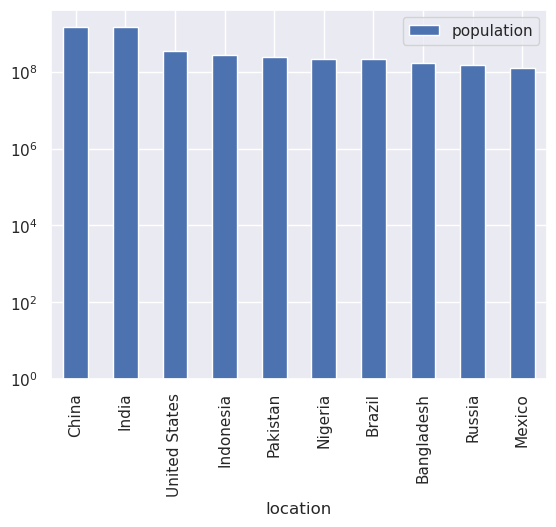

In [ ]:
populacao.plot.bar(x = 'location', y = 'population', log = True)

<AxesSubplot:xlabel='location'>

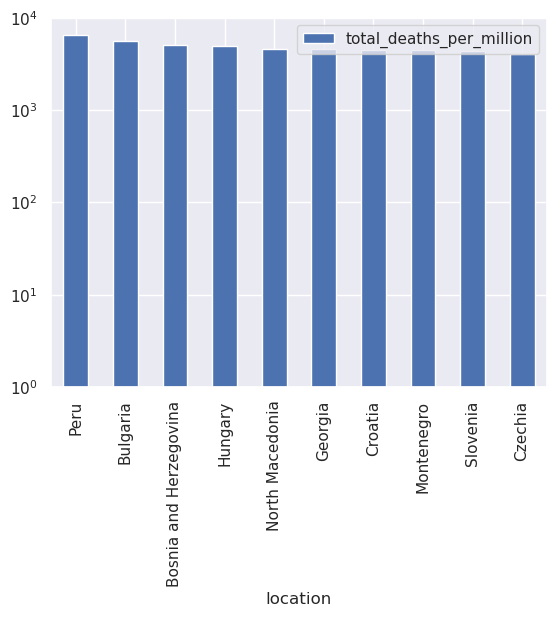

In [ ]:
mortes_prop.plot.bar(x = 'location', y = 'total_deaths_per_million', log = True)

<AxesSubplot:xlabel='location'>

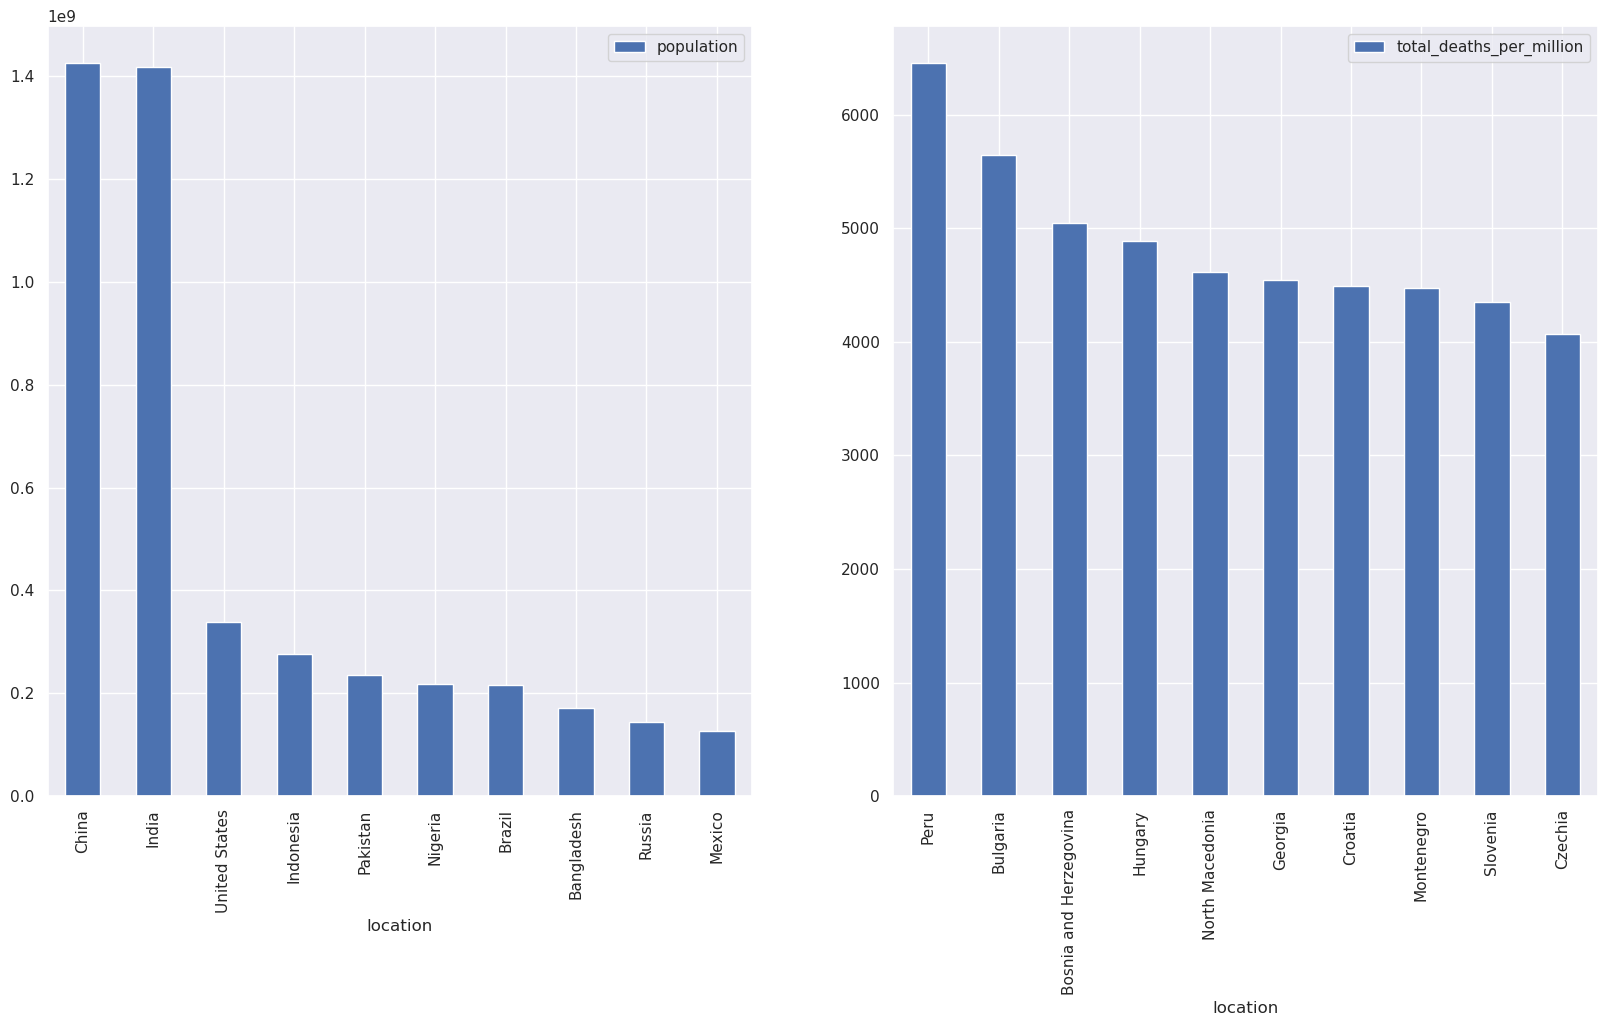

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,10))

populacao.plot.bar(x = 'location', y = 'population', ax = ax[0])
mortes_prop.plot.bar(x = 'location', y = 'total_deaths_per_million', ax = ax[1])


### Resposta: Nenhum dos paises mais populosos estão entre os paises que tiveram maior proporção de mortes.

### 2) Qual é a proporção de pessoas vacinadas que foram hospitalizadas devido à COVID-19 em comparação com pessoas não vacinadas?


In [ ]:
vacinas = vacinas.dropna(subset = 'continent')

In [ ]:
vacinados = vacinas.sort_values(by = 'people_vaccinated', ascending = False).drop_duplicates(subset=['location']).head(10)

In [ ]:
vacinados

,iso_code,continent,location,date,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
53796,CHN,Asia,China,2/9/2023,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,48.4,NaN,4.34,76.91,0.76,NaN,NaN,NaN,NaN
121977,IND,Asia,India,4/17/2023,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.65,NaN,NaN,NaN,NaN
286072,USA,North America,United States,4/11/2023,NaN,NaN,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.93,NaN,NaN,NaN,NaN
123088,IDN,Asia,Indonesia,1/17/2023,NaN,NaN,NaN,NaN,NaN,NaN,...,2.8,76.1,64.20,1.04,71.72,0.72,NaN,NaN,NaN,NaN
37082,BRA,South America,Brazil,3/22/2023,NaN,NaN,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.20,75.88,0.77,NaN,NaN,NaN,NaN
204779,PAK,Asia,Pakistan,4/2/2023,NaN,NaN,NaN,NaN,NaN,NaN,...,2.8,36.7,59.61,0.60,67.27,0.56,NaN,NaN,NaN,NaN
22751,BGD,Asia,Bangladesh,4/17/2023,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,44.7,34.81,0.80,72.59,0.63,NaN,NaN,NaN,NaN
132756,JPN,Asia,Japan,4/16/2023,NaN,NaN,NaN,NaN,NaN,NaN,...,11.2,33.7,NaN,13.05,84.63,0.92,NaN,NaN,NaN,NaN
170462,MEX,North America,Mexico,10/7/2022,NaN,NaN,NaN,NaN,NaN,NaN,...,6.9,21.4,87.85,1.38,75.05,0.78,NaN,NaN,NaN,NaN
295642,VNM,Asia,Vietnam,3/30/2023,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,45.9,85.85,2.60,75.40,0.70,NaN,NaN,NaN,NaN


In [ ]:
hospitalizados = mortes.sort_values(by = 'icu_patients_per_million', ascending = False).drop_duplicates(subset=['location']).head(10)


<AxesSubplot:xlabel='location'>

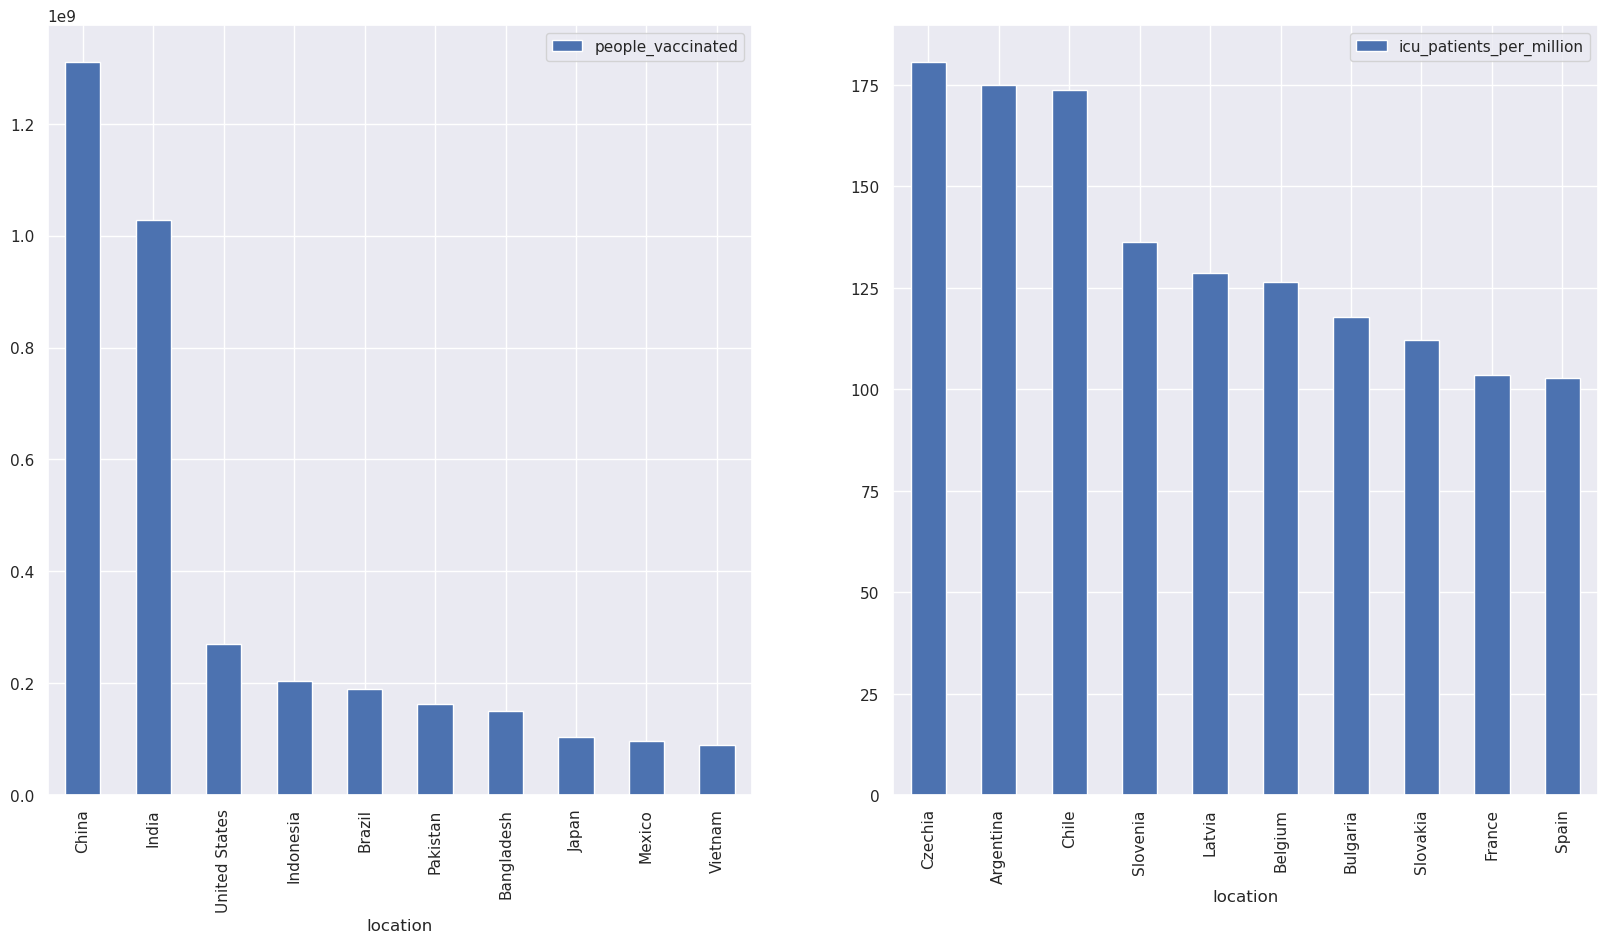

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,10))

vacinados.plot.bar(x = 'location', y = 'people_vaccinated', ax = ax[0])
hospitalizados.plot.bar(x = 'location', y = 'icu_patients_per_million', ax = ax[1])

<b> Os paises que aplicaram mais vacinas não estao entre os paises que mais tiveram pessoas hospitalizadas.

3) A quantidade de pessoas hospitalizadas diminuiu quando o total de vacinação aumentou?


In [ ]:
mortes.head(10)

,iso_code,continent,location,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
date,,,,,,,,,,,,,,,,,,,,,
1/3/2020,OWID_WRL,NaN,World,7975105024,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/4/2020,OWID_WRL,NaN,World,7975105024,3.0,3.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/5/2020,OWID_WRL,NaN,World,7975105024,3.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/6/2020,OWID_WRL,NaN,World,7975105024,6.0,3.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/7/2020,OWID_WRL,NaN,World,7975105024,6.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/8/2020,OWID_WRL,NaN,World,7975105024,6.0,0.0,0.857,NaN,0.0,0.000,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/9/2020,OWID_WRL,NaN,World,7975105024,7.0,1.0,1.000,NaN,0.0,0.000,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/10/2020,OWID_WRL,NaN,World,7975105024,7.0,0.0,1.000,NaN,0.0,0.000,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/11/2020,OWID_WRL,NaN,World,7975105024,8.0,1.0,0.714,NaN,0.0,0.000,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mortes = pd.read_csv('/home/luanny/Área de Trabalho/covid-19-dataset/COVID DEATHS.csv',
                     index_col = 'date')

vacinas = pd.read_csv('/home/luanny/Área de Trabalho/covid-19-dataset/COVID_VACCINATIONS.csv',
                      index_col = 'date')

mortes = mortes[mortes['location'] == 'World']
vacinas = vacinas[vacinas['location'] == 'World']


Ordenando o dataframe pela data

In [ ]:
df.keys()

Index(['iso_code', 'continent', 'location', 'population', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
   

In [ ]:
df = pd.concat([mortes, vacinas])

<AxesSubplot:xlabel='date'>

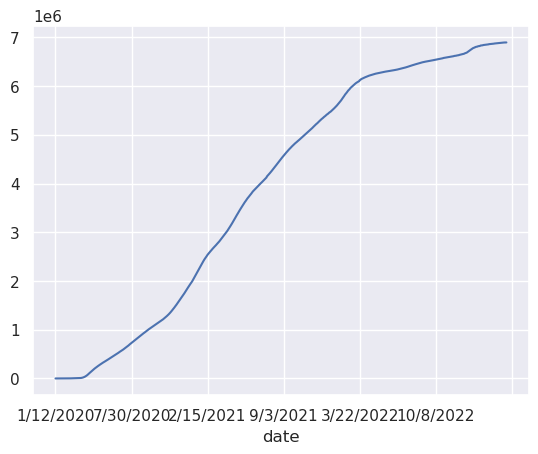

In [ ]:
df['total_deaths'].dropna().plot()

<AxesSubplot:xlabel='date'>

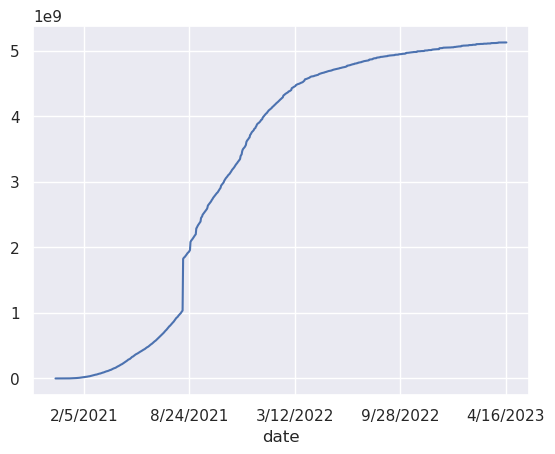

In [ ]:
df['people_fully_vaccinated'].plot()

In [ ]:
df.plot.bar(y = ['hosp_patients', 'people_vaccinated'])

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fb4f4fb2040> (for post_execute):


KeyboardInterrupt: 

Pegando somente os dados para localização Mundo (World)

In [ ]:
!python3 -m pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.8/361.8 kB 27.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 69.1 MB/s eta 0:00:00
 

from autoviz import AutoViz_Class

%matplotlib inline
AV = AutoViz_Class()

filename = "/home/luanny/Área de Trabalho/covid-19-dataset/COVID DEATHS.csv"
target_variable = "total_deaths"

dft = AV.AutoViz(
    filename,
    sep=",",
    depVar=target_variable,
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir="/home/luanny/Área de trabalho/Projeto_COVID_PANDAS_BRASKEN/figs/"
)